# Histogram function testing
Creates functions for making histograms with get_jobs. contains testing of function examples.

This notebook contains functions for histogram, 2D hisotgram, and for finding maximum of a hisotgram.

In [1]:
def histo(jobs, factor = [], title = None, bins = 50, scale = 'log', color = None, save = False, fmt = 'pdf'):
    
    """
    Returns a bar graph of a specific metric from a set of jobs. Expects jobs with fmt='dict'.
    Can edit image in notebook by putting in plt commands after histo(), in same shell.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of jobs in format that works with get_jobs.
                 
    
    factor   : string, mandatory
               Mandatory. Variable plotted in histogram. must be one of the following:
               'exitcode','duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
               'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
               'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    title    : string, optional
               Title at top of plot 
               
    bins     : int, optional
               Sets number of bins in histogram.
               Default is 50 bins. Must be at least 4.
    
    scale    : string, optional
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.
               
    color    : string, optional
               Any color that matplotlib accepts.
               No input results in automatic color
               
    save     : True or False, optional
               Saves figure to folder 'epmt_analysis_plots', and creates folder if it doesn't exist
               file name is factor_hist2d.pdf
               
    fmt      : string, optional
               only works if save = True
               format of saved image. default 'pdf'              
    """
    #Plotting done with matplotlib
    import sys
    sys.path.insert(0,'/home/Avery.Kiihne/pip_experiment')
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    
    #get jobs
    if type(jobs) != type([]) or type(jobs[0]) != type({}):
        jobs = eq.get_jobs(jobs = jobs, fmt = 'dict')
    #pull data from jobs
    data_list = []
    for job_instance in range(len(jobs)):
        if jobs[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
            data_list.append(jobs[job_instance][factor])
    #incase of a zero set
    if sum(data_list) == 0:
        return print('No non-zero data found in ',factor)
        
    #make plot
    plt.figure()
    plt.style.use('default')
    
    #optional features
    #title of plot
    if title:
        plt.title(title)
    #bin check for zero, as it messes up np.log10()
    if min(data_list) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(data_list))
    #set scaling factor
    if scale == 'log':
        plt.hist(data_list, bins = np.logspace(bottom_bin,np.log10(max(data_list)),bins), color = color)
        plt.xscale('log')
    if scale == 'linear':
        plt.hist(data_list, bins = np.linspace(min(data_list),max(data_list),bins), color = color)
        plt.xscale('linear')  

    #finish up
    plt.ylabel('Counts')
    plt.xlabel(factor)
    plt.tight_layout()   #cleans up spacing
    #saving mechanisms. Creates a directory if it doesn't exist
    if save:
        if not os.path.isdir('plots_epmt_analysis/'):
            os.makedirs('plots_epmt_analysis/')
        plt.savefig('plots_epmt_analysis/'+factor+'_histo.'+fmt, format = fmt, bbox_inches='tight')


In [9]:
#get data to test on
import epmt_query as eq
import sys
import time
start = time.time()
job_num = 5000   #number of jobs grabbed
jobs_all = []
loops = 4 #number of times job_num is split up. helps with large job queries
for aa in range(loops):
    jobs_temp = eq.get_jobs(limit=job_num/loops, before = -1, offset = job_num*aa/loops, 
                           fmt='dict')
    jobs_all.extend(jobs_temp)
    print('at ',(aa+1)*100/loops,'% completion. time elapsed:',(time.time()-start)/60)

at  25.0 % completion. time elapsed: 0.019973226388295493
at  50.0 % completion. time elapsed: 0.04283172289530436
at  75.0 % completion. time elapsed: 0.07151271104812622
at  100.0 % completion. time elapsed: 0.09094220797220866


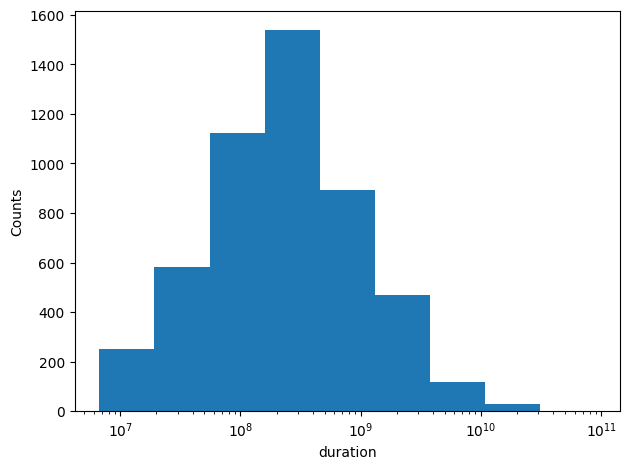

In [10]:
# basic test
histo(jobs = jobs_all, factor = 'duration', bins = 10, save = True, fmt = 'png')

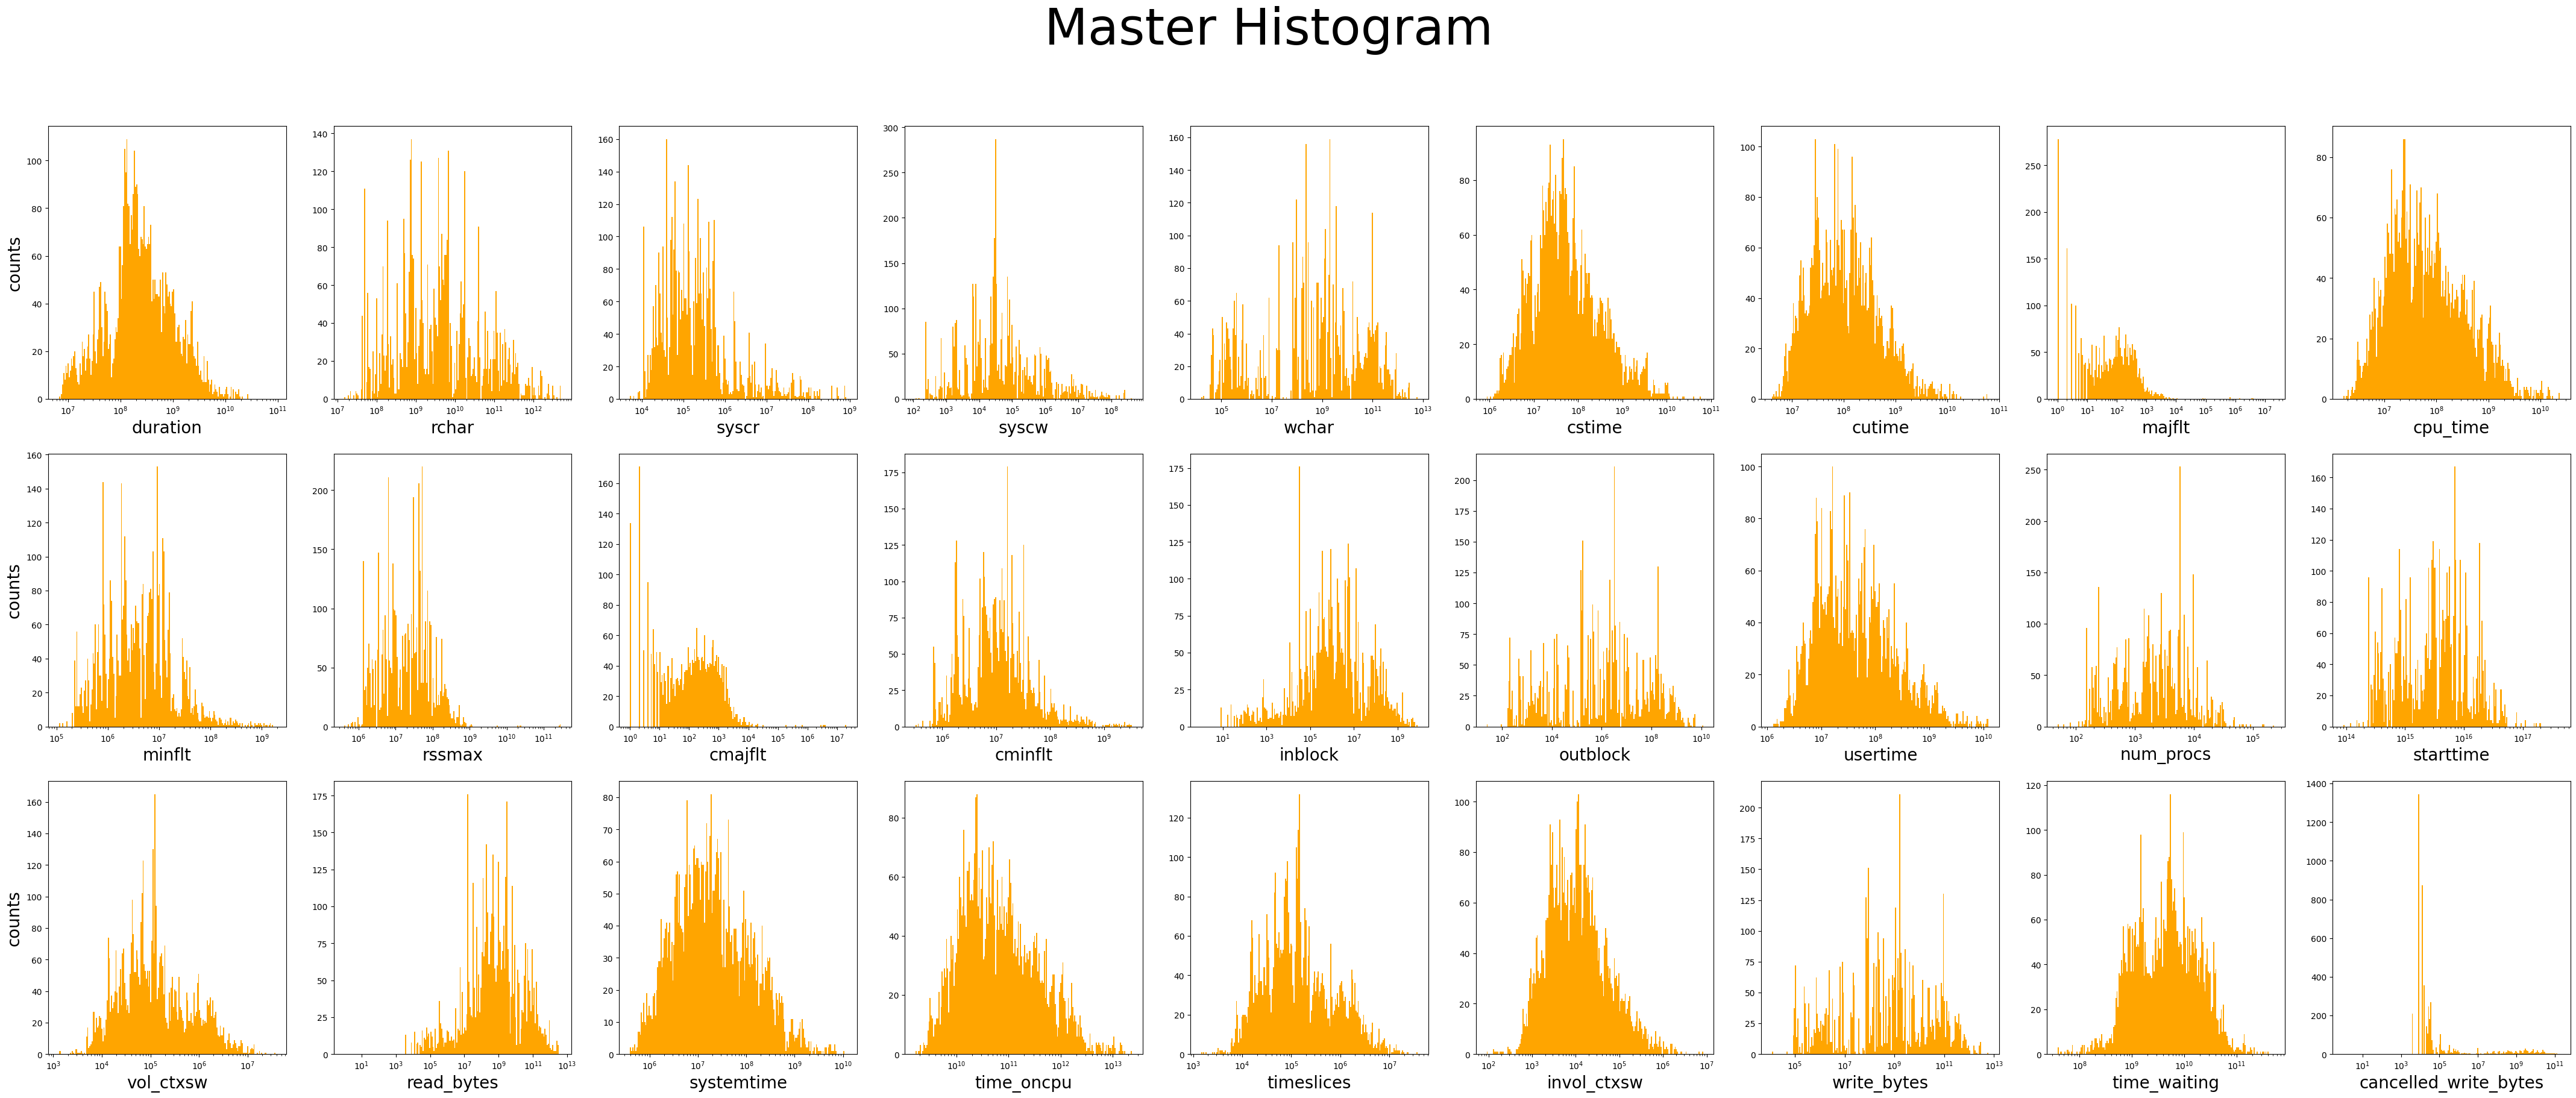

In [11]:
#attempt 2 at making plot of all factors
#setup
import numpy as np
sys.path.insert(0,'/home/Avery.Kiihne/pip_experiment')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3,ncols=9,figsize=(54,20))
ax =ax.ravel() 
#create dictionary for data
factor_list = [ 'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt','cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'starttime', 'vol_ctxsw', 'read_bytes', 'systemtime', 'time_oncpu', 'timeslices', 'invol_ctxsw', 'write_bytes', 'time_waiting', 'cancelled_write_bytes']
factor_dict = {}
for i in factor_list:
    factor_dict[i] = []

for ff in range(len(factor_list)):
    factor = factor_list[ff]
    for job_instance in range(len(jobs_all)):
        if jobs_all[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
            factor_dict[factor].append(jobs_all[job_instance][factor])
    #print(len(data_list))
    #make plot
    plt.style.use('default')

    bins = 200
    #bin check for zero, as it messes up np.log10()
    if min(factor_dict[factor]) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(factor_dict[factor]))
    #set scaling factor
    ax[ff].hist(factor_dict[factor], bins = np.logspace(bottom_bin,np.log10(max(factor_dict[factor])),bins), color = 'orange')
    ax[ff].set_xlabel(factor, fontsize = 20)
    ax[ff].set_xscale('log')
ax[0].set_ylabel('counts', fontsize = 20)
ax[9].set_ylabel('counts', fontsize = 20)
ax[18].set_ylabel('counts', fontsize = 20)
plt.suptitle('Master Histogram', fontsize = 60)
plt.savefig('analysis_plots/super_hist.pdf', bbox_inches='tight', format = 'pdf')

## max_id Function
This function will be a callable flag in histogram functions that identifies the largest column and reports data on it.

In [12]:
def max_id( jobs= [], factor =[], bins = 20, scale = 'log'):
    
    """
    Returns a bar graph of a specific metric from a set of jobs. Expects jobs with fmt='dict'.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of data in 'int' format.
              
    factor   : string, mandatory
             Mandatory. Variable plotted in histogram. must be one of the following:
             'exitcode','duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
             'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
             'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    bins  : int, optional
               Sets number of bins in histogram array. Default is 20.
    
    scale    : string, optional
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.
    """
    import numpy as np
    #process data
    data = []
    refined_jobs = []
    for job_instance in range(len(jobs)):
        if jobs[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
            data.append(jobs[job_instance][factor])
            refined_jobs.append(jobs[job_instance])
    #set binning based on scale
    if scale == 'log':
        #bin check for zero, as it messes up np.log10()
        if min(data) == 0:
            bottom_bin = 0
        else:
            bottom_bin = np.log10(min(data))
        bins  = np.logspace(bottom_bin,np.log10(max(data)),bins)
    else:
        bins = np.linspace(min(data),max(data),bins)
    #make histogram data
    hist_data = np.histogram(data,bins = bins)
    counts = hist_data[0].tolist()   #convert from python array
    max_bins = [hist_data[1][counts.index(max(counts))],hist_data[1][counts.index(max(counts))+1]]
    #get ids for jobs in the largest bin
    ids = []
    for job_instance in range(len(data)):
        if float(data[job_instance]) >=max_bins[0]  and float(data[job_instance]) <= max_bins[1]:
            ids.append(refined_jobs[job_instance].get('jobid'))

    #outputs
    print('largest bin is bin ',max_bins,', with a count of ', max(counts), '\n This is ',(max(counts)/len(data))*100,'% of the total data entries')
    return ids

# 2D histogram function
very similar structure to 1D fucntion. creates 2D histogram (heatmap) 

In [13]:
def hist2d(jobs = [],x = [],y =[], title = None, bins = None, scale = 'log', save = False, fmt = 'pdf'):
    
    """
    Returns a 2D histogram of two specific metrics from a set of jobs. Expects jobs with fmt='dict'.
    Can edit image in notebook by putting in plt commands after hist2d(), in same shell.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of jobs in 'dict' format.
                 
    
    x,y     : string, mandatory
             Variable plotted in histogram. must be one of the following:
             'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
             'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
             'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    title    : string, optional
               Title at top of plot 
               
    bin_num  : int, optional
               Sets number of bins in histogram.
               Default is 50 bins. Must be at least 4.
    
    scale    : string, optional
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.

    save     : True or False, optional
               Saves figure to folder 'epmt_analysis_plots', and creates folder if it doesn't exist
               file name is [x]_[y]_hist2d.pdf

     fmt     : string, optional
               only works if save = True
               format of saved image. default 'pdf'                   
    """
    #Plotting done with matplotlib
    import sys
    sys.path.insert(0,'/home/Avery.Kiihne/pip_experiment')
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    #pull data from jobs
    data_listx = []
    data_listy = []
    for job_instance in range(len(jobs)):
        if jobs[job_instance].get(x) != None and jobs[job_instance].get(y) != None:   #prevents breakage if set is empty or doesn't exist
            data_listx.append(jobs[job_instance][x])
            data_listy.append(jobs[job_instance][y])
    #print(len(data_list))
    #make plot
    plt.figure()
    plt.style.use('default')
    
    #optional features
    #title of plot
    if title:
        plt.title(title)
    #set number of bins
    if bins:
        bins = bins
    else:
        bins = 20
    #check for zero in lowest bin
    if min(min(data_listx),min(data_listy)) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(min(data_listx),min(data_listy)))
    #set scaling factor
    if scale == 'log':
        plt.hist2d(data_listx,data_listy, bins = np.logspace(bottom_bin,np.log10(max(max(data_listx),max(data_listy))),bins))
        plt.xscale('log')
        plt.yscale('log')
    if scale == 'linear':
        plt.hist2d(data_listx,data_listy, bins = np.linspace(min(min(data_listx),min(data_listy)),max(max(data_listx),max(data_listy)),bins))
        plt.xscale('linear')  
        plt.yscale('linear')  
    #finish up
    plt.colorbar(label = 'Counts')
    
    plt.ylabel(y)
    plt.xlabel(x)
    plt.tight_layout()   #cleans up spacing
    #saving mechanisms. Creates a directory if it doesn't exist
    if save:
        if not os.path.isdir('epmt_analysis_plots/'):
            os.makedirs('epmt_analysis_plots/')
        plt.savefig('epmt_analysis_plots/'+x+y+'_histo.'+fmt, format = fmt, bbox_inches='tight')

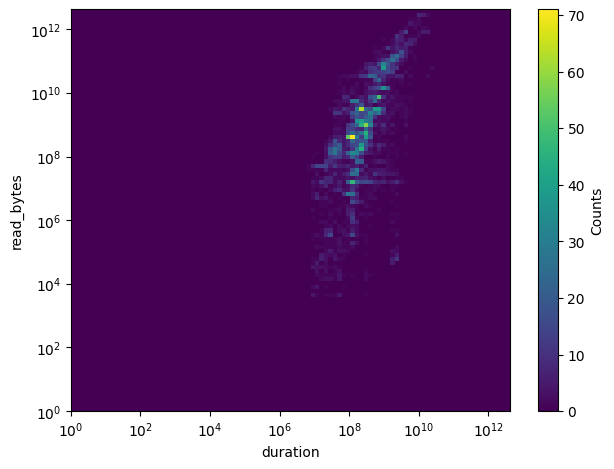

In [14]:
hist2d(jobs = jobs_all, x='duration', y='read_bytes', bins = 100, scale = 'log')

In [29]:
'''#run evry possible combination. commented out to save space
factor_list = [ 'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt','cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'starttime', 'vol_ctxsw', 'read_bytes', 'systemtime', 'time_oncpu', 'timeslices', 'invol_ctxsw', 'write_bytes', 'time_waiting', 'cancelled_write_bytes']
copy_list= factor_list 
c = 0
for xx in factor_list:
    copy_list.remove(xx)
    for yy in copy_list:
        c += 1
        print('x-axis is ',xx,' y-axis is ',yy)
        hist2d(jobs = jobs_all, x=xx, y=yy, bins = 100, scale = 'log')'''

"#run evry possible combination. commented out to save space\nfactor_list = [ 'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt','cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'starttime', 'vol_ctxsw', 'read_bytes', 'systemtime', 'time_oncpu', 'timeslices', 'invol_ctxsw', 'write_bytes', 'time_waiting', 'cancelled_write_bytes']\ncopy_list= factor_list \nc = 0\nfor xx in factor_list:\n    copy_list.remove(xx)\n    for yy in copy_list:\n        c += 1\n        print('x-axis is ',xx,' y-axis is ',yy)\n        hist2d(jobs = jobs_all, x=xx, y=yy, bins = 100, scale = 'log')"

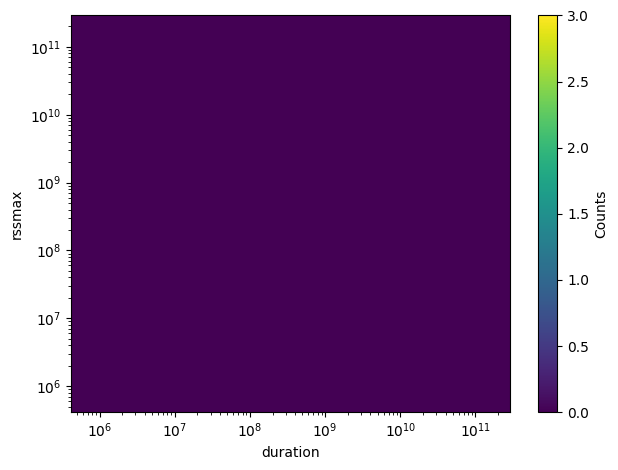

In [24]:
hist2d(jobs = jobs_all, x = 'duration', y ='rssmax', bins =30000)